# Тензорное разложение в Python

Основная цель -реализация тензорной декомпозиции в Python. В соответствии с этими целями мы реализуем тензорную декомпозицию с использованием двух библиотек, доступных в Python [tensorly](http://tensorly.org/stable/index.html ) и [tensortools](https://tensortools-docs.readthedocs.io/en/latest) и простая реализация тензорной декомпозиции с помощью Numpy. Кроме того, результаты этих трех подходов сравниваются с точки зрения ошибки восстановления и времени выполнения.

## Содержание
1. **Тензорное разложение**
2. **Реализация**
- Tensorly
- tensortools
- Numpy
3. **Результаты и сравнение**

**Тензор**: Тензор - это **многомерный массив**. Также известен как **n-образный массив **, в котором "n" означает "размерность". Следовательно, почти все геометрические структуры данных, с которыми мы работаем, являются тензорами. Вплоть до $d = 2$ эти тензоры имеют определенные имена:
- тензор нулевой размерности: **скаляр**
- одномерный тензор: **вектор**
- двумерный тензор: **матрица**

Одна вещь, которую следует иметь в виду, и которую может быть полезно знать для следующих разделов, заключается в том, что по мере увеличения размеров структуры данных нам требуется больше значений, чтобы найти один элемент нашей структуры данных. Например, мы можем найти любой элемент матрицы, используя два значения $(i, j)$, и любой элемент тензора с помощью трех значений $ (i, j, k)$. Вот визуальное представление (вплоть до трехмерных тензоров)

<center>
    <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/d-way.png" alt="d-way" width="500" align="center"/>   
</center>

**Разложение**: В математическом анализе это означает факторизацию n-мерного тезора. В системном анализе это состоит в нахождении оптимального разделения системы с точки зрения ее подсистем. В целом, разложение нужно для получения гораздо более простого набора составляющих, которые могут наилучшим образом представлять данную систему (или данные) [[1]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2735056/pdf/nihms39318.pdf ).

### Матричное разложение

 Анализ основных компонентов (PCA), Анализ независимых компонентов (ICA), Неотрицательную матричную факторизацию (NMF) и анализ разреженных компонентов (SCA). Эти методы стали стандартными инструментами, например, для извлечения признаков или классификации [[2]](https://ieeexplore.ieee.org/abstract/document/7038247). Общая идея: Дано $X \in \mathbb{R}^{I \times J}$, хотим модель $M$ которая аппроксимирует $X$ такая что $\textbf{a} \in \mathbb{R}^I $ и $\textbf{b} \in \mathbb{R}^J$, так что:

$$ X \approx M = \sum_{r=1}^{R} a_r \cdot b_r^{T} = a_r \circ b_r = A \cdot B^T $$

$$ X \in \mathbb{R}^{I \times J}, \textbf{a} \in \mathbb{R}^I, \textbf{b} \in \mathbb{R}^J$$

<center>
    <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/matrix-decomposition.png" alt="matrix-decomposition" width="800" align="center"/>
</center>

Такое разложение известно как *Факторный анализ*. Приведенная выше формулировка страдает от проблемы, называемой **Проблемой вращения**. То есть мы можем вставить любую невырожденную матрицу вращения, $ Z $, в приведенную выше формулировку, и все равно получим то же приближение $X$ (учитывая, что столбцы Z имеют амплитуду 1).

$$ X \approx M = \sum_{r=1}^{R} a_r \circ z_r^T \circ z_r^{-1} \circ b_r^{T} = A \cdot Z^T \cdot Z^{-1} \cdot B^T $$

Следовательно, если приведенная выше формула не имеет ограничений, она приводит к бесконечному множеству комбинаций $A $ и $ B$. Стандартные матричные факторизации в линейной алгебре, такие как QR-факторизация, разложение на собственные значения (EVD) и разложение по сингулярным значениям (SVD), являются лишь частными случаями приведенной выше формулировки и обязаны своей уникальностью жестким ограничениям, таким как треугольность и ортогональность. [[2]](https://ieeexplore.ieee.org/abstract/document/7038247 )

### Тензорное разложение

Хотим модель $M$ которая апроксимирует $X \in \mathbb{R}^{I \times J \times K}$, так что $\textbf{a} \in \mathbb{R}^I $, $\textbf{b} \in \mathbb{R}^J$, и $\textbf{c} \in \mathbb{R}^K$ таким образом:

$$ X \approx M = \sum_{r=1}^{R} a_r \circ b_r \circ c_r$$

$$X \in \mathbb{R}^{I \times J \times K}, \textbf{a} \in \mathbb{R}^I, \textbf{b} \in \mathbb{R}^J, \textbf{c} \in \mathbb{R}^K$$

R - это **ранг**.В результате у нас есть 3 матрицы $A \in \mathbb{R}^{I \times R}$, $B \in \mathbb{R}^{J \times R}$, $C \in \mathbb{R}^{K \times R}$.

<center>
    <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/tensor-decomposition.png" alt="tensor-decomposition" width="800" align="center"/>
</center>

## Как найти A, B и C?

Приведенный здесь пример основан на [этой статье](https://doi.org/10.1016/j.neuron.2018.05.015 ), в которой используется тензорное разложение для исследований в области нейробиологии.

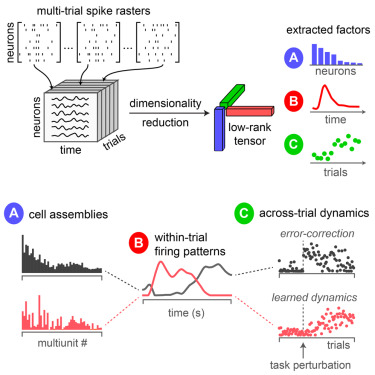

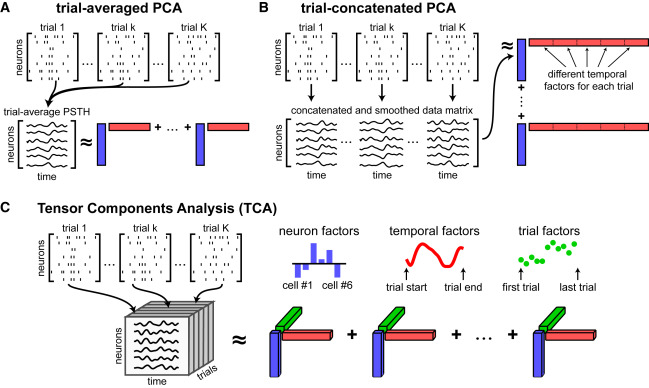

<center>
    <p float="left">
      <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/model.png" style="width:43%" />
      <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/neuron-time.png" style="width:56%" /> 
    </p>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis, PCA
import tensortools as tt
from tensortools.operations import unfold as tt_unfold, khatri_rao
import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac

from utils import *

Using numpy backend.


### Пример Тензора

In [3]:
time_factor = np.load("data/time_factor.npy")
neuron_factor = np.load("data/neuron_factor.npy")
trial_factor = np.load("data/trial_factor.npy")
latent = np.load("data/latent.npy")
observed = np.load("data/observed.npy")

Ниже показано, как амплитуда каждого из скрытых факторов (нейронов) изменяется с течением времени и запусков:

<center>
    <p float="left">
      <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/factor0.png" style="width:32%" />
      <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/factor1.png" style="width:32%" /> 
      <img src="https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/factor2.png" style="width:32%" /> 
    </p>
</center>

сохраним матрицы $A$, $B$, $C$ для последующего сравнения.

In [4]:
factors_actual = (normalize(time_factor), normalize(neuron_factor), normalize(trial_factor))

## Реализация тензорного разложения с помощью библиотек

Вызовите функцию разложения и передайте тензор и ранг (количество факторов). В **Tensorly** функция называется "parafac", которая реализует каноническое полиадическое (CP) разложение с помощью  ALS метода. Существует история возникновения этого названия, но оно также известно как Каноническая декомпозиция (CANDECOMP), а также параллельная факторизация (PARAFAC). В **tensortools** он называется "cp_als", который реализует то же самое.

Ниже приведен минимальный код для реализации CP разложения тензора в обеих библиотеках:
- Укажите тензор и ранг (количество факторов)
- Используйте функцию для разложения тензора
- Кроме того, мы можем восстановить оценку $M$, используя функцию "реконструировать", предусмотренную в скрипте.

In [37]:
X, rank = observed, 3

In [6]:
# TensorLy
factors_tl = parafac(X, rank=rank)

# tensortools
U = tt.cp_als(X, rank=rank, verbose=False)
factors_tt = U.factors.factors

In [7]:
# Восстановим исходный набор данных
M_tl = reconstruct(factors_tl)
M_tt = reconstruct(factors_tt)

In [8]:
# Определяем ошибку восстановлеия
rec_error_tl = np.mean((X-M_tl)**2)
rec_error_tt = np.mean((X-M_tt)**2)

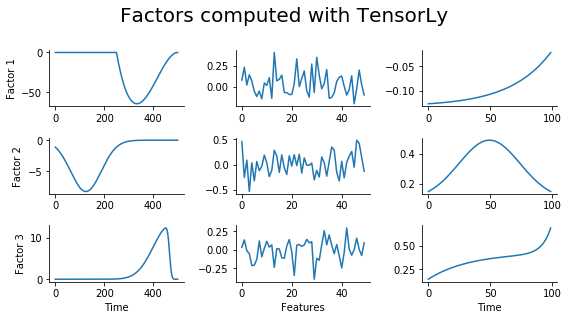

In [38]:
# Визуализируем факторы полученные с помощью Tensorly
plot_factors(factors_tl, d=3)
plt.suptitle("Factors computed with TensorLy", y=1.1, fontsize=20);

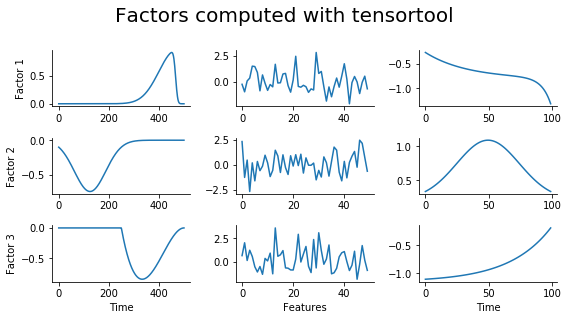

In [16]:
# Визуализируем факторы полученные с помощью Tensortools
plot_factors(factors_tt, d=3)
plt.suptitle("Factors computed with tensortool", y=1.1, fontsize=20);

### Тензорное разложение через Numpy

В конечном счете, мы хотели бы свести к минимуму разницу между $ X $  и $ M $ (оценка модели, которая является приближением $ X $). Следовательно, мы можем сформулировать нашу функцию потерь как квадрат ошибки между $X$ и $M$:

$$\underset{A, B, C}{\operatorname{min}} \sum_{i, j, k} (x_{ijk} - m_{ijk})^2 = \underset{A, B, C}{\operatorname{min}} \sum_{i, j, k} (x_{ijk} - \sum_{r=1}^{R} a_{ir} b_{jr} c_{kr})^2$$

$ M $ вычисляется с использованием трех матриц $A $, $ B $ и $ C$, все из которых мы не знаем. Один из способов найти их - оптимизировать для одной, одновременно исправляя две других. Как только мы оптимизируем одну из них, мы используем ее как фиксированную матрицу, оптимизируя для другой. И мы чередуем оптимизацию $A$, $B $ и $ C$ до сходимости или критерия остановки. Следовательно, мы собираемся записать нашу функцию потерь для каждой матрицы следующим образом:

$$\underset{\color{red}{A}}{\operatorname{min}} \sum_{i, j, k} (x_{ijk} - \sum_{r=1}^{R} \color{red}{a_{ir}} b_{jr} c_{kr})^2 = 
\underset{\color{red}{A}}{\operatorname{min}} || X_{(0)} - \color{red}{A}(B \odot C)^T ||_F^2$$

$$\underset{\color{red}{B}}{\operatorname{min}} \sum_{i, j, k} (x_{ijk} - \sum_{r=1}^{R} a_{ir} \color{red}{b_{jr}} c_{kr})^2 = 
\underset{\color{red}{B}}{\operatorname{min}} || X_{(1)} - \color{red}{B}(A \odot C)^T ||_F^2$$

$$\underset{\color{red}{C}}{\operatorname{min}} \sum_{i, j, k} (x_{ijk} - \sum_{r=1}^{R} a_{ir} b_{jr} \color{red}{c_{kr}})^2 = 
\underset{\color{red}{C}}{\operatorname{min}} || X_{(2)} - \color{red}{C}(A \odot B)^T ||_F^2$$

Где $X_{(0)}$ обозначает нулевую моду, разворачивающий тензор X в матрицу, и так далее. и $ (B \dot C) ^ T$ обозначает произведение *Хатри-Рао*, который объединяет B и C в единую матрицу. 
В целом, это невыпуклая проблема; однако, когда мы оптимизируем одну матрицу за раз, это выпуклая проблема. Если вы хотите узнать больше о развертывании тензора в матрицу, нажмите сюда [ссылку](http://jeankossaifi.com/blog/unfolding.html ).

In [17]:
def decompose_three_way(tensor, rank, max_iter=501, verbose=False):

    # a = np.random.random((rank, tensor.shape[0]))
    b = np.random.random((rank, tensor.shape[1]))
    c = np.random.random((rank, tensor.shape[2]))

    for epoch in range(max_iter):
        # optimize a
        input_a = khatri_rao([b.T, c.T])
        target_a = tl.unfold(tensor, mode=0).T
        a = np.linalg.solve(input_a.T.dot(input_a), input_a.T.dot(target_a))

        # optimize b
        input_b = khatri_rao([a.T, c.T])
        target_b = tl.unfold(tensor, mode=1).T
        b = np.linalg.solve(input_b.T.dot(input_b), input_b.T.dot(target_b))
                            
        # optimize c
        input_c = khatri_rao([a.T, b.T])
        target_c = tl.unfold(tensor, mode=2).T
        c = np.linalg.solve(input_c.T.dot(input_c), input_c.T.dot(target_c))

        if verbose and epoch % int(max_iter * .2) == 0:
            res_a = np.square(input_a.dot(a) - target_a)
            res_b = np.square(input_b.dot(b) - target_b)
            res_c = np.square(input_c.dot(c) - target_c)
            print("Epoch:", epoch, "| Loss (C):", res_a.mean(), "| Loss (B):", res_b.mean(), "| Loss (C):", res_c.mean())
        
    return a.T, b.T, c.T

In [18]:
factors_np = decompose_three_way(X, rank, verbose=False)

In [19]:
a, b, c = factors_np
factors = (normalize(a), normalize(b), normalize(c))

In [20]:
M_np = reconstruct(factors_np)
rec_error_np = np.mean((X-M_np)**2)

Сравнение между тремя подходами при оценке $X$.

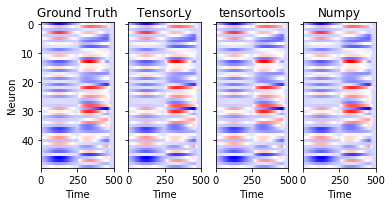

In [21]:
fig, axes = plt.subplots(1, 4, sharey=True)
tensors = [X, M_tl, M_tt, M_np]
titles = ["Ground Truth", "TensorLy", "tensortools", "Numpy"]
trial_num = 50

for title, tensor, ax in zip(titles, tensors, axes):
    ax.imshow(tensor[:, :, trial_num].T, cmap='bwr', aspect=20)
    ax.set_xlabel("Time")
    ax.set_title(title)
axes[0].set_ylabel("Neuron");

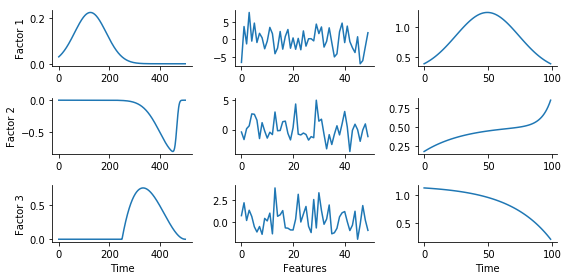

In [22]:
plot_factors(factors_np, d=3)

Оказывается, иногда факторы могут быть инвертированы. Однако, если один из них перевернут, то, безусловно, другой также должен быть перевернут. Следовательно, в зависимости от ожиданий и интерпретации, может потребоваться изменить некоторые факторы. Столбцы соответствуют факторам, а строки матрицам ($A$, $B$, $C$).

In [31]:
# a[:, 1] = a[:, 1] * -1
# b[:, 1] = b[:, 1] * -1
# c[:, 2] = c[:, 2] * -1

Нормализуем факторы, для того чтобы сравнить с ground true

In [32]:
factors = (normalize(a), normalize(b), normalize(c))

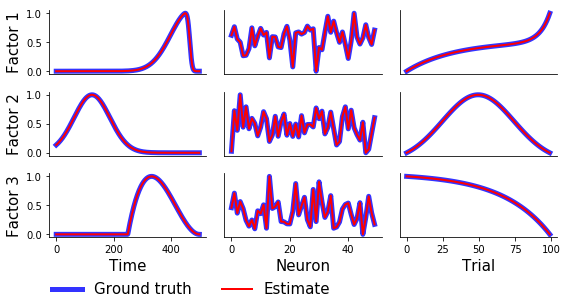

In [34]:
fig, axes = plt.subplots(rank, 3, figsize=(8, int(rank * 1.2 + 1)))
compare_factors(factors, factors_actual, factors_ind=[1, 0, 2], fig=fig);

### Сравнение трех подходов

#### Ошибка восстановления

In [28]:
import timeit

In [95]:
iter_num = 50
times = {'tl': [], 'tt': [], 'np': []}
rec_errors = {'tl': [], 'tt': [], 'np': []}

# TensorLy
for i in range(iter_num):
    start_time = timeit.default_timer()
    factors_tl = parafac(X, rank=rank, tol=0, n_iter_max=200)
    end_time = timeit.default_timer() - start_time
    times['tl'].append(end_time)
    M_tl = reconstruct(factors_tl)
    rec_error_tl = np.mean((X-M_tl)**2)
    rec_errors['tl'].append(rec_error_tl)
    print("TensorLy | Iteration: {} / {} | time take: {} sec".format(i+1, iter_num, end_time))

# tensortools
for i in range(iter_num):
    start_time = timeit.default_timer()
    U = tt.cp_als(X, rank=rank, tol=0, max_iter=200, verbose=False)
    factors_tt = U.factors.factors
    end_time = timeit.default_timer() - start_time
    times['tt'].append(end_time)
    M_tt = reconstruct(factors_tt)
    rec_error_tt = np.mean((X-M_tt)**2)
    rec_errors['tt'].append(rec_error_tt)
    print("tensortools | Iteration: {} / {} | time take: {} sec".format(i+1, iter_num, end_time))

# Numpy
for i in range(iter_num):
    start_time = timeit.default_timer()
    factors_np = decompose_three_way(X, rank, max_iter=200, verbose=False)
    end_time = timeit.default_timer() - start_time
    times['np'].append(end_time)
    M_np = reconstruct(factors_np)
    rec_error_np = np.mean((X-M_np)**2)
    rec_errors['np'].append(rec_error_np)
    print("Numpy | Iteration: {} / {} | time take: {} sec".format(i+1, iter_num, end_time))

TensorLy | Iteration: 1 / 50 | time take: 6.189968061999025 sec
TensorLy | Iteration: 2 / 50 | time take: 5.103389932000937 sec
TensorLy | Iteration: 3 / 50 | time take: 5.202910553000038 sec
TensorLy | Iteration: 4 / 50 | time take: 5.042781312000443 sec
TensorLy | Iteration: 5 / 50 | time take: 5.418428597000457 sec
TensorLy | Iteration: 6 / 50 | time take: 4.99306524199892 sec
TensorLy | Iteration: 7 / 50 | time take: 5.076207145999433 sec
TensorLy | Iteration: 8 / 50 | time take: 4.9819122289991356 sec
TensorLy | Iteration: 9 / 50 | time take: 5.086766334999993 sec
TensorLy | Iteration: 10 / 50 | time take: 5.418789782999738 sec
TensorLy | Iteration: 11 / 50 | time take: 5.1663993160000246 sec
TensorLy | Iteration: 12 / 50 | time take: 5.082561846000317 sec
TensorLy | Iteration: 13 / 50 | time take: 5.092519859999811 sec
TensorLy | Iteration: 14 / 50 | time take: 5.05783010200139 sec
TensorLy | Iteration: 15 / 50 | time take: 5.603638996000882 sec
TensorLy | Iteration: 16 / 50 | ti

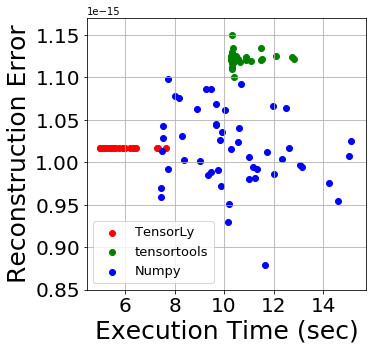

In [290]:
plt.figure(figsize=(5, 5)) #, dpi=200)
factor = 1e15
plt.scatter(np.array(times['tl']), np.array(rec_errors['tl']), c='red', label="TensorLy")
plt.scatter(np.array(times['tt']), np.array(rec_errors['tt']), c='green', label="tensortools")
plt.scatter(np.array(times['np']), np.array(rec_errors['np']), c='b', label="Numpy")
plt.xlabel("Execution Time (sec)", fontsize=25)
plt.ylabel("Reconstruction Error", fontsize=25)
plt.ylim(0.85 * 1e-15, 1.17 * 1e-15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="lower left", fontsize=13);
plt.grid()

# plt.savefig("metric-1.png", transparent=True, bbox_inches='tight')

**Обратите внимание**, что в зависимости от результата этого теста некоторые значения могут быть отклонениями. Ниже приведен порог, который я применил для удаления выбросов.

In [149]:
lim = 3 * 1e-15
pkg = 'tt'
times[pkg] = np.array(times[pkg])[np.array(rec_errors[pkg]) < lim].tolist()
rec_errors[pkg] = np.array(rec_errors[pkg])[np.array(rec_errors[pkg]) < lim].tolist()